In [62]:
import pandas as pds
import numpy as npy
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 

Data = (pds.read_csv("intermediaire.csv",delimiter=";"))
Data = Data.drop(["LoanId"],axis=1)

In [50]:
Colonnes = npy.array(Data.columns)
print(Colonnes)

['Default' 'NewCreditCustomer' 'LoanDate' 'VerificationType'
 'Language_Estonian ' 'Language_English' 'Language_Russian'
 'Language_Finnish' 'Language_German' 'Language_Slovakian' 'Country_EE'
 'Country_ES' 'Country_FI' 'Country_SK' 'Age' 'Gender_woman'
 'Gender_Undefined' 'Education' 'MaritalStatus' 'Unemployed'
 'Partially_employed' 'Fully_employed' 'Self_employed' 'Entrepreneur'
 'Retiree' 'AppliedAmount' 'Interest' 'LoanDuration' 'MonthlyPayment'
 'UseOfLoan' 'EmploymentDurationCurrentEmployer_+5'
 'EmploymentDurationCurrentEmployer_Trial'
 'EmploymentDurationCurrentEmployer_max1'
 'EmploymentDurationCurrentEmployer_max2'
 'EmploymentDurationCurrentEmployer_max3'
 'EmploymentDurationCurrentEmployer_max4'
 'EmploymentDurationCurrentEmployer_max5'
 'EmploymentDurationCurrentEmployer_retiree'
 'EmploymentDurationCurrentEmployer_other' 'IncomeFromPrincipalEmployer'
 'IncomeFromPension' 'IncomeFromFamilyAllowance' 'IncomeFromSocialWelfare'
 'IncomeFromLeavePay' 'IncomeFromChildSupport' 

In [63]:
Data = (npy.array(Data)).T
print(Data.shape)
print(Data)

(59, 79950)
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [2.01750000e+03 2.01750000e+03 2.01750000e+03 ... 2.01566667e+03
  2.01525000e+03 2.01575000e+03]
 ...
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [64]:
Data_Xfinance = Data[50:].T
Data_Xnormal = Data[1:50].T #1:51
Data_Y = Data[1:2].reshape(79950,).T

print(Data_Xfinance.shape,Data_Xnormal.shape,Data_Y.shape)

(79950, 9) (79950, 49) (79950,)


with 1 arbres 0.7452657911194497
with 11 arbres 0.7450281425891182
with 21 arbres 0.7462163852407755
with 31 arbres 0.7442901813633521
with 41 arbres 0.7493808630393997
with 51 arbres 0.7473045653533459
with 61 arbres 0.7474546591619763
with 71 arbres 0.7479174484052533
with 81 arbres 0.7508692933083178
with 91 arbres 0.7495059412132583


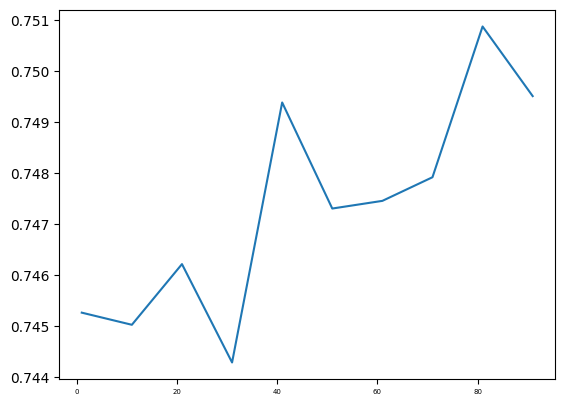

In [170]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

acc=[]
for i in range(1,100,10):
    reg = RandomForestClassifier(max_depth=5,n_estimators=50,criterion="gini",random_state=i,min_samples_leaf=20)
    reg = reg.fit(Data_Xnormal.T[1:].T,Data_Y)
    print("with {0} arbres".format(i),accuracy_score(Data_Y, reg.predict(Data_Xnormal.T[1:].T)))
    acc.append([i,accuracy_score(Data_Y, reg.predict(Data_Xnormal.T[1:].T))])

def fds():
    from sklearn.ensemble import RandomForestClassifier 
    fin = RandomForestClassifier(max_depth=15,n_estimators=50,random_state=0,min_samples_leaf=10)
    fin = fin.fit(Data_Xfinance.T[1:].T,Data_Y)
    from sklearn.metrics import accuracy_score
    print(accuracy_score(Data_Y, fin.predict(Data_Xfinance.T[1:].T)))


accuracy= (npy.array(acc).T)

plt.plot(accuracy[0],accuracy[1])

In [112]:
print((reg.feature_importances_))
print(fin.feature_importances_)

[7.16611181e-01 1.53355336e-02 2.84881047e-03 5.57560891e-03
 0.00000000e+00 8.62124311e-04 0.00000000e+00 4.06486155e-03
 0.00000000e+00 1.42336623e-02 0.00000000e+00 7.63480603e-03
 0.00000000e+00 1.19587907e-03 0.00000000e+00 0.00000000e+00
 8.36738109e-03 0.00000000e+00 1.12408429e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.01386230e-02 7.01006139e-02 3.96569288e-03 1.92889263e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.20397729e-04 0.00000000e+00 4.01447914e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.11329246e-04 6.93200647e-02 1.78418126e-02
 6.42736967e-03]
[0.0480942  0.02107322 0.17345101 0.12132436 0.38819178 0.04188479
 0.03072665 0.17525399]


[1 2 3 4 5 6 7 8]


<BarContainer object of 8 artists>

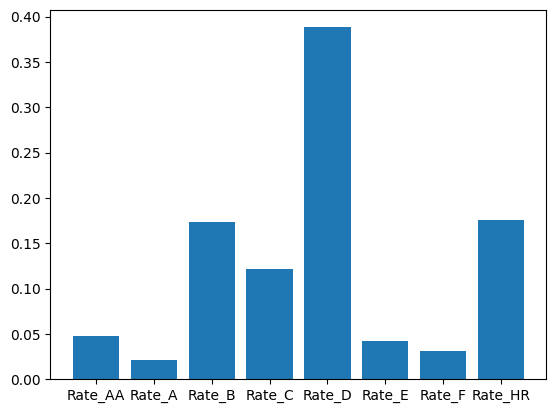

In [57]:
rank = npy.array(range(1,9))
print(rank)

import matplotlib.pyplot as plt
plt.bar(Colonnes[51:],fin.feature_importances_)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


<BarContainer object of 48 artists>

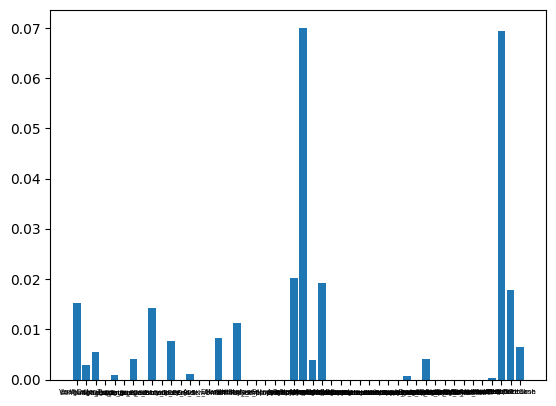

In [120]:
rank = npy.array(range(1,50))
print(rank)

import matplotlib.pyplot as plt
import matplotlib as m
m.rc('xtick', labelsize=5) 
m.rc('ytick', labelsize=10) 
plt.bar(Colonnes[2:50],reg.feature_importances_[1:])

In [141]:
from sklearn import linear_model
c=0
logit = linear_model.LogisticRegression(max_iter=2000)
logit.fit(Data_Xnormal,Data_Y)
print(accuracy_score(Data_Y, logit.predict(Data_Xnormal)))

accuracy = []
#for i in range(1,10000,1000):    
#    logit = linear_model.LogisticRegression(max_iter=i)
#    logit.fit(Data_Xnormal,Data_Y)
#    accuracy.append([i,accuracy_score(Data_Y, logit.predict(Data_Xnormal))])

#accuracy= (npy.array(accuracy).T)

#plt.plot(accuracy[0],accuracy[1])


0.9982614133833646


C:\Users\luang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
